# BIOS512 Assignment #5

## Gaby Zuckerman (onyen: gmz0512, PID: 730169801)

## Due: November 17, 2020

Read in the [Volcano eruptions](https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-12/eruptions.csv) data from the TidyTuesday project with `read_csv`.

In [43]:
library("tidyverse")

volcano <- read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-12/eruptions.csv")

Parsed with column specification:
cols(
  volcano_number = col_double(),
  volcano_name = col_character(),
  eruption_number = col_double(),
  eruption_category = col_character(),
  area_of_activity = col_character(),
  vei = col_double(),
  start_year = col_double(),
  start_month = col_double(),
  start_day = col_double(),
  evidence_method_dating = col_character(),
  end_year = col_double(),
  end_month = col_double(),
  end_day = col_double(),
  latitude = col_double(),
  longitude = col_double()
)



Use the `print` function to find the number of rows and columns in the data.

In [3]:
volcano %>% print 

# A tibble: 11,178 x 15
   volcano_number volcano_name eruption_number eruption_catego… area_of_activity
            <dbl> <chr>                  <dbl> <chr>            <chr>           
 1         266030 Soputan                22354 Confirmed Erupt… NA              
 2         343100 San Miguel             22355 Confirmed Erupt… NA              
 3         233020 Fournaise, …           22343 Confirmed Erupt… NA              
 4         345020 Rincon de l…           22346 Confirmed Erupt… NA              
 5         353010 Fernandina             22347 Confirmed Erupt… NA              
 6         273070 Taal                   22344 Confirmed Erupt… NA              
 7         282050 Kuchinoerab…           22345 Confirmed Erupt… NA              
 8         241040 Whakaari/Wh…           22338 Confirmed Erupt… 1978/90 Crater …
 9         311060 Semisopochn…           22341 Confirmed Erupt… NA              
10         284096 Nishinoshima           22340 Confirmed Erupt… NA              
# … 

#### There are 11,178 rows and 15 columns in the dataset.

Using `group_by`, `summarize` (or `count`), and `arrange`, find the volcano with the most recorded eruptions in the data. Remeber the [desc](https://dplyr.tidyverse.org/reference/desc.html) function can be used to sort in descending order.

In [4]:
eruption_numbers <- volcano %>% 
    group_by(volcano_name) %>% 
    summarize(N = n()) %>% 
    arrange(desc(N)) 

eruption_numbers %>% head

`summarise()` ungrouping output (override with `.groups` argument)



volcano_name,N
<chr>,<int>
Etna,241
"Fournaise, Piton de la",194
Asosan,186
Villarrica,164
Asamayama,147
Katla,132


#### The volcano with the most recorded eruptions is Etna.

Using `filter` and `arrange`, what is the year of the most recent eruption for the volcano above (i.e. the volcano with the most recorded eruptions in the data)? 

In [5]:
volcano %>% 
    filter(volcano_name == "Etna") %>%
    arrange(desc(end_year)) %>%
    head()

volcano_number,volcano_name,eruption_number,eruption_category,area_of_activity,vei,start_year,start_month,start_day,evidence_method_dating,end_year,end_month,end_day,latitude,longitude
<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
211060,Etna,20841,Confirmed Eruption,New Southeast Crater (NSEC),2,2013,9,3,Historical Observations,2020,4,17,37.748,14.999
211060,Etna,13854,Confirmed Eruption,"Bocca Nuova, NE and SE Craters",1,2010,8,25,Historical Observations,2013,4,27,37.748,14.999
211060,Etna,13853,Confirmed Eruption,SE Crater,2,2010,4,8,Historical Observations,2010,4,8,37.748,14.999
211060,Etna,13852,Confirmed Eruption,East base of NE Crater (3000-2650 m),1,2008,5,13,Historical Observations,2009,7,4,37.748,14.999
211060,Etna,13849,Confirmed Eruption,"Bocca Nuova, SE Crater and flank vents",2,2007,3,19,Historical Observations,2008,5,16,37.748,14.999
211060,Etna,13848,Confirmed Eruption,SE Crater & flank vents; NE Crater,2,2006,7,14,Historical Observations,2006,12,15,37.748,14.999


#### The most recent Etna eruption (#20841) began in 2013 and ended in 2020.

Make a bar chart of eruption count by volcano_name. The bars should be sorted by frequency using `fct_infreq`. "Lump" the low frequency values into an "Other" category with `fct_lump`.

**Bonus:** Can you remove the "Other" category with the `filter` function if it dominates the chart?

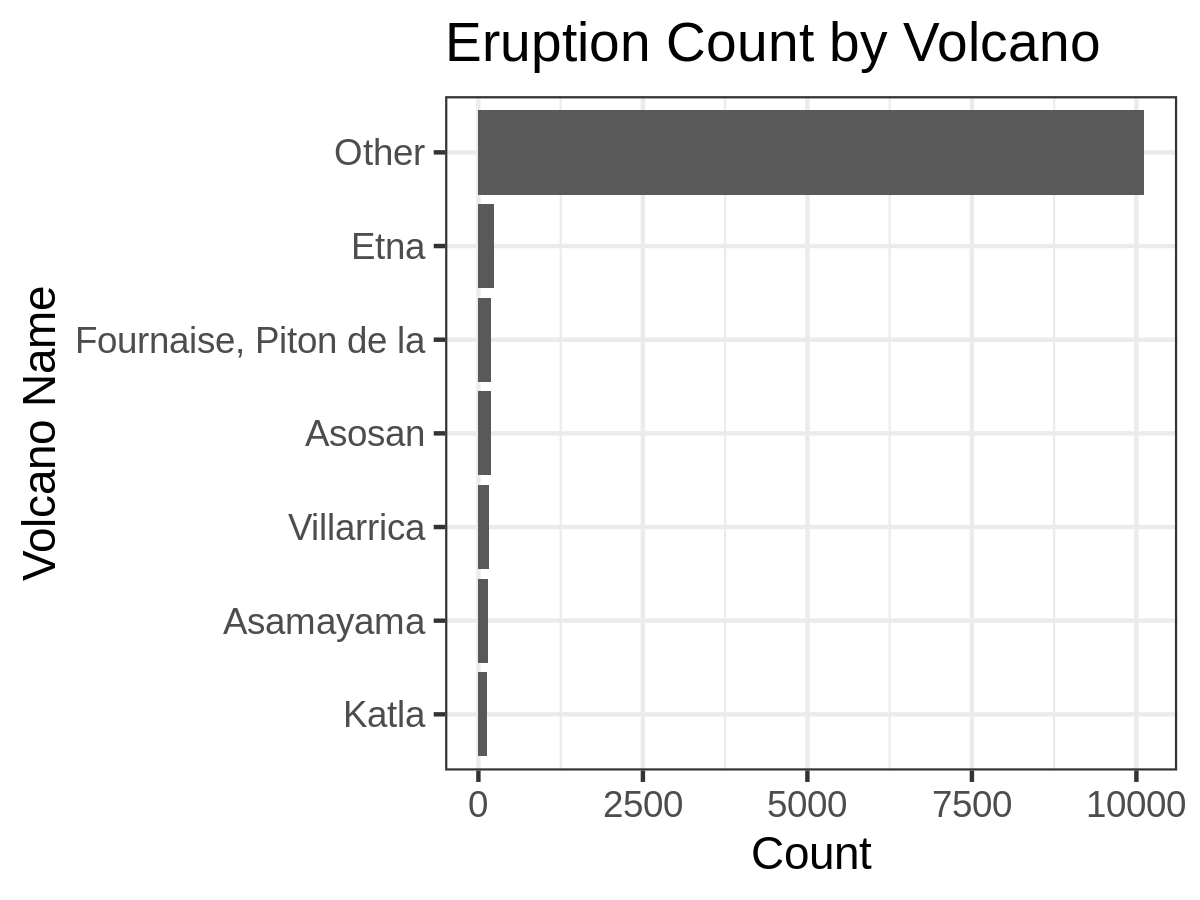

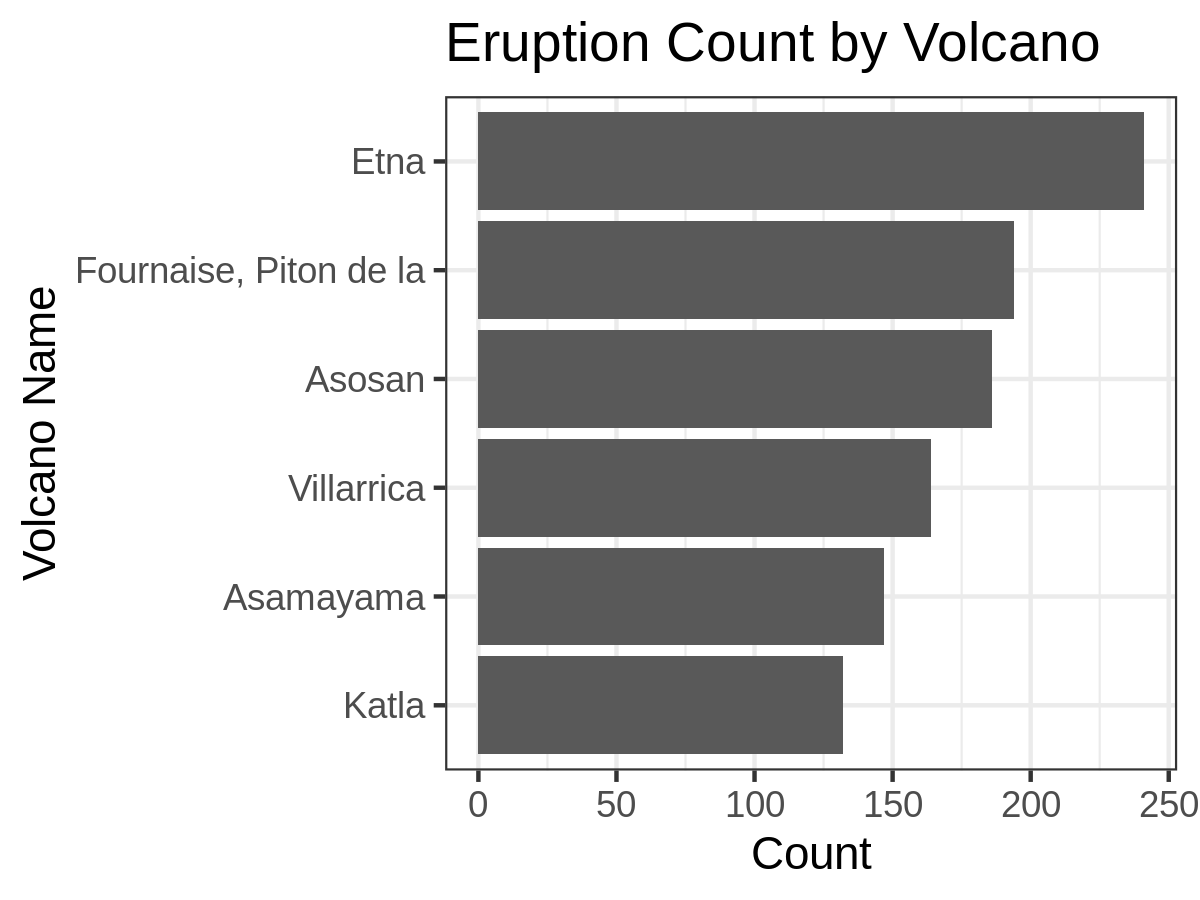

In [15]:
options(repr.plot.width = 4, repr.plot.height = 3, repr.plot.res = 300)

######### GRAPH 1 #########

df_graph1 = volcano %>%
    mutate(N_lumped = volcano_name %>% fct_lump(n = 6) %>% fct_infreq() %>% fct_rev)

p1 = ggplot(df_graph1, aes(x = N_lumped)) + geom_bar() + coord_flip() +
     labs(title = "Eruption Count by Volcano", x = "Volcano Name", y = "Count") + 
     theme_bw()

p1

######### GRAPH 2 #########

df_graph2 = df_graph1 %>% 
    filter(N_lumped != "Other")

p2 = ggplot(df_graph2, aes(x = N_lumped)) + geom_bar() + coord_flip() +
     labs(title = "Eruption Count by Volcano", x = "Volcano Name", y = "Count") + 
     theme_bw()

p2

Using `mutate` generate a column that represents the span of each eruption in years (i.e. "end_year" minus "start_year"). Use `filter` to exclude eruption spans shorter than ten years. 

- Plot a histogram of your generated column (i.e. eruption spans greater than ten years).
- Which volcano(s) has/have the longest eruption span in years? How long did the eruption last?

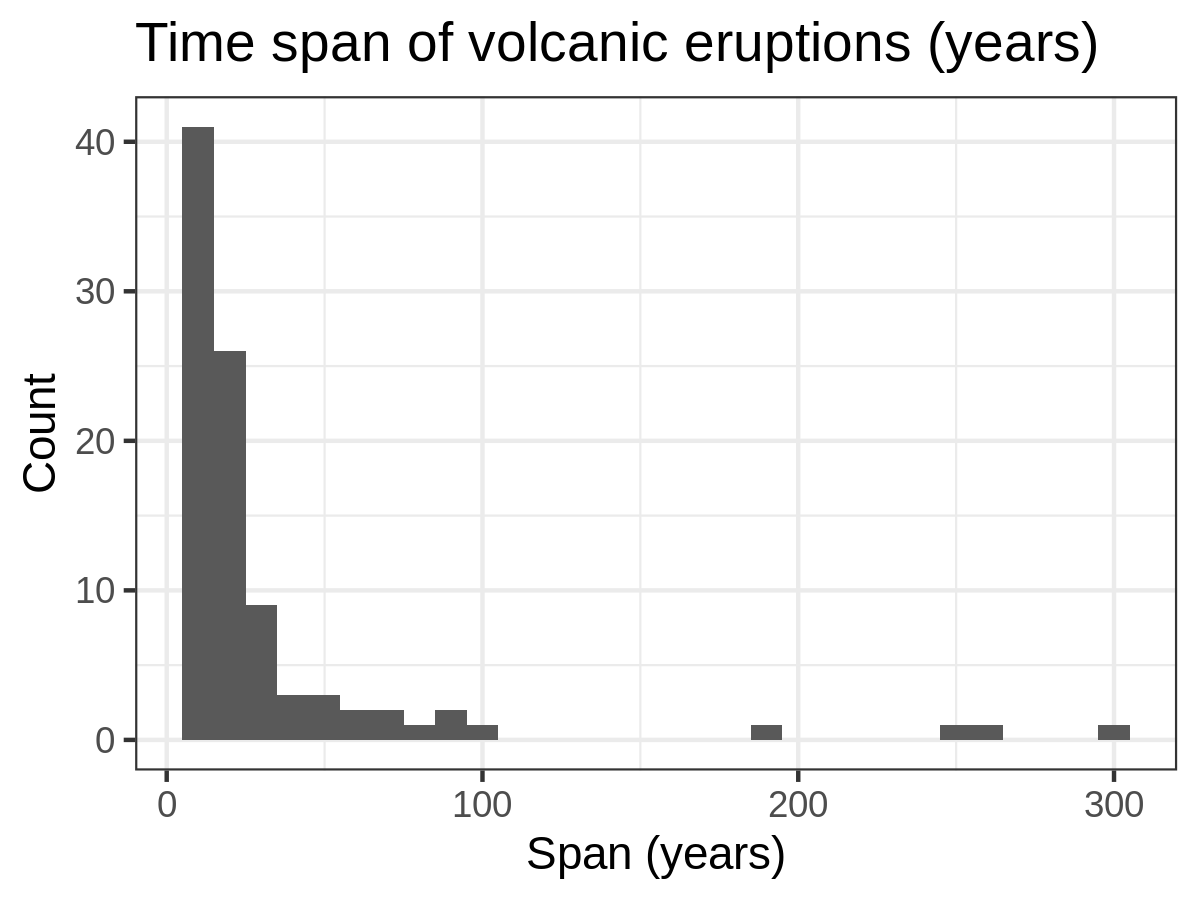

In [41]:
volcano_span = volcano %>% 
    mutate(span = end_year - start_year) %>%
    filter(span >= 10)

p3 = ggplot(volcano_span, aes(x = span)) + geom_histogram(binwidth = 10) +
     labs(title = "Time span of volcanic eruptions (years)", x = "Span (years)", y = "Count") +
     theme_bw()
p3

In [42]:
volcano_span %>% arrange(desc(span)) %>% head()

volcano_number,volcano_name,eruption_number,eruption_category,area_of_activity,vei,start_year,start_month,start_day,evidence_method_dating,end_year,end_month,end_day,latitude,longitude,span
<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
211040,Stromboli,13425,Confirmed Eruption,Summit craters and Sciara del Fuoco,3,1558,0,0,Historical Observations,1857,0,0,38.789,15.213,299
384010,Fogo,13128,Confirmed Eruption,Pico,1,1500,0,0,Historical Observations,1761,0,0,14.950,-24.350,261
257100,Yasur,15355,Confirmed Eruption,NA,3,1774,7,2,Historical Observations,2020,4,17,-19.532,169.447,246
352090,Sangay,11647,Confirmed Eruption,NA,3,1728,9,30,Historical Observations,1916,0,0,-2.005,-78.341,188
342030,Santa Maria,10626,Confirmed Eruption,SW flank (Santiaguito),3,1922,6,22,Historical Observations,2020,4,17,14.757,-91.552,98
268010,Dukono,16577,Confirmed Eruption,Malupang Magiwe and Malupang Warirang,3,1933,8,13,Historical Observations,2020,4,17,1.693,127.894,87


#### The volcano with the longest eruption span is Stromboli with 299 years. 

Other volcanoes with long eruption spans include:
* Fogo - 261 years
* Yasur - 246 years
* Sangay - 188 years